In [4]:
import pandas as pd
import networkx as nx
import networkx.algorithms.community as nxcom
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df_alph = pd.read_csv('soc-sign-bitcoinalpha.csv',header=None)
df_alph.rename(columns = {0:'SOURCE', 1:'TARGET',2:'RATING',3:'TIME'}, inplace = True)
df_alph

SOURCE  TARGET  RATING        TIME
0        7188       1      10  1407470400
1         430       1      10  1376539200
2        3134       1      10  1369713600
3        3026       1      10  1350014400
4        3010       1      10  1347854400
...       ...     ...     ...         ...
24181    7604    7601      10  1364270400
24182    7601    7604      10  1364270400
24183    7604    7602      10  1364270400
24184    7602    7604      10  1364270400
24185    7604    7603     -10  1364270400

[24186 rows x 4 columns]

In [5]:
#visulization the dataset
G = nx.from_pandas_edgelist(df_alph, source='SOURCE', target='TARGET',edge_attr='RATING',create_using=nx.DiGraph())

In [11]:
# community = nxcom.greedy_modularity_communities(G)

In [12]:
# def make_color_map(g, coms):
#     color_map = dict()
#
#     for i, x in enumerate(coms):
#         for y in x:
#             color_map.update({y: i})
#
#     colors = [color_map.get(node) for node in g.nodes()]
#     return colors

In [6]:
# This function uses Clauset-Newman-Moore greedy modularity maximization to find the community partition with the largest modularity.
coms1 = list(nxcom.greedy_modularity_communities(G))
# return a list of frozensets of nodes, one for each community. Sorted by length with largest communities first.

In [51]:
# Girvan–Newman method.
coms2 = list(nxcom.girvan_newman(G))[0]
# return Iterator over tuples of sets of nodes in G. Each set of node is a community, each tuple is a sequence of communities at a particular level of the algorithm.

In [ ]:
coms3 = nxcom.naive_greedy_modularity_communities(G)
# return a list of sets of nodes, one for each community. Sorted by length with largest communities first.

In [ ]:
#  asynchronous fluid communities algorithm
com4 = list(nxcom.asyn_fluidc(G))
# return Iterable of communities given as sets of nodes.

In [ ]:
# Finds communities in G using a semi-synchronous label propagation method
com5 = list(nxcom.label_propagation_communities(G))
# return A dict_values object that contains a set of nodes for each community.

In [ ]:
# detected by asynchronous label propagation.
com6 = list(nxcom.asyn_lpa_communities(G))
# return Iterable of communities given as sets of nodes.

### Test using first: greedy_modularity_communities

In [7]:
len(coms1)

65

In [12]:
for fs in coms1[:7]:
    print(len(fs))

1282
1160
533
244
128
83
63


In [19]:
G_reverse = nx.reverse(G)

In [14]:
sub_G = G.subgraph(coms1[5])

In [16]:
nx.is_strongly_connected(sub_G)

False

In [ ]:
for i, com in enumerate(coms1):
    if nx.is_strongly_connected(G.subgraph(com)):
        print(i)

In [18]:
for i, com in enumerate(coms1):
    if not nx.is_weakly_connected(G.subgraph(com)):
        print(i)

# All are weakly connected

In [29]:
def cal_internal_weights(com):
    sub_G = G.subgraph(com)
    weights = 0
    ratings = nx.get_edge_attributes(sub_G, 'RATING')
    for edge in sub_G.edges():
        weights += ratings[edge]

    return weights, len(sub_G.edges())

def cal_external_weights(com):
    generator = nx.edge_boundary(G_reverse, com)
    weights = 0
    cnt = 0
    ratings = nx.get_edge_attributes(G_reverse, 'RATING')
    for edge in generator:
        weights += ratings[edge]
        cnt += 1
    return weights, cnt

In [45]:
def analyze_communities(coms):
    iws, ics, ews, ecs = [],[],[],[] #internal, external
    iaws, eaws = [],[] # average
    diffs = [] # difference

    for com in coms:
        iw, ic = cal_internal_weights(com)
        ew, ec = cal_external_weights(com)
        if ec == 0:
            continue
        iws.append(iw)
        ics.append(ic)
        ews.append(ew)
        ecs.append(ec)
        iaw = round(iw/ic, 2)
        eaw = round(ew/ec, 2)
        iaws.append(iaw)
        eaws.append(eaw)
        diffs.append(iaw - eaw)
    
    return iaws, eaws, diffs


In [42]:
def analyze_difference(diffs):
    diffs = np.array(diffs)
    plt.hist(diffs)
    plt.show()

In [50]:
iaws, eaws, diffs = analyze_communities(coms2)

NameError: name 'coms2' is not defined

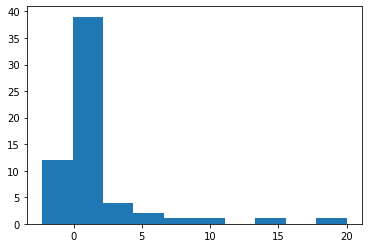

([0.5,
  -0.17999999999999994,
  0.42000000000000015,
  0.47,
  1.06,
  0.45999999999999996,
  0.2100000000000004,
  1.1700000000000002,
  1.0,
  -0.33000000000000007,
  1.23,
  -0.43999999999999995,
  -2.3,
  13.52,
  0.8999999999999999,
  1.1700000000000002,
  1.1800000000000002,
  4.2299999999999995,
  1.4300000000000002,
  3.1,
  0.8099999999999998,
  1.79,
  1.28,
  -1.4499999999999997,
  1.65,
  1.71,
  1.1300000000000001,
  6.17,
  11.0,
  1.8,
  3.0,
  0.5,
  -0.5,
  0.0,
  0.25,
  0.0,
  0.0,
  0.0,
  6.0,
  -0.33000000000000007,
  0.0,
  20.0,
  8.0,
  -1.67,
  0.16999999999999993,
  4.0,
  2.0,
  1.0,
  2.0,
  -0.5,
  -1.0,
  0.0,
  0.5,
  0.0,
  0.5,
  0.0,
  -1.0,
  0.0,
  -2.0,
  0.0,
  0.0],
 None)

In [49]:
diffs, analyze_difference(diffs) 